## Logistic Reg Classification

We’ll use the popular Breast Cancer dataset from scikit-learn to demonstrate the model.

Why Logistic Regression?

Use Case: Logistic Regression is widely used for binary classification tasks where the target variable has two categories (e.g., yes/no, malignant/benign).
Interpretability: The output can be interpreted as probabilities, making it easier to understand the likelihood of the outcomes

In [4]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer  # Load the dataset
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=load_breast_cancer()

data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
# Step 2: Load the Breast Cancer dataset

#independent features
X=pd.DataFrame(data=data.data ,columns=data.feature_names)
#or X=pd.DataFrame(data=data['data'] ,columns=data['featre_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
#Dependent feature
y = pd.Series(data.target)  # Target (binary classification: 0 = malignant, 1 = benign)
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

In the breast cancer dataset example:

Benign refers to a non-cancerous tumor.

Malignant refers to a cancerous tumor that can grow and spread.

In [9]:
y.value_counts()

1    357
0    212
Name: count, dtype: int64

In [10]:
# Step 3: Split the dataset into training and testing sets (67% train, 33% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Hyperparameter C in Logistic Regression  :
In Logistic Regression, the hyperparameter C controls the regularization strength. It is the inverse of the regularization parameter λ (lambda).

C is a hyperparameter controlling regularization in Logistic Regression.

A large C weakens regularization (risk of overfitting), while a small C strengthens it (risk of underfitting).

C = 0.1 or C = 0.01 means stronger regularization.

C = 100 or C = 10 means weaker regularization.

## Define Hyperparameters for Grid Search

In [13]:
# Define a range of hyperparameter values for 'C' to test

params = {'C': [0.01, 0.1, 1, 10, 100]}

#Tuning C can improve performance metrics like accuracy, precision, recall, or F1-score, depending on the evaluation goals.

In [14]:
# Step 4: Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=100000)  # max_iter increased for convergence

 ### Perform Grid Search for Hyperparameter(C) Tuning
We will use GridSearchCV to test all possible values of 'C' and find the best one based on cross-validation performance.

In [16]:
log_reg= GridSearchCV(estimator=logreg ,param_grid=params ,scoring='accuracy' ,cv=5)  #performance metric we take accuracy_Score

Choosing cv=5 for cross-validation is a practical choice that balances the trade-offs between having enough folds to provide a reliable estimate of model performance and not overburdening the computational resources. 
It is widely used and generally provides a good compromise between bias, variance, and computational efficiency.

In [18]:
# Fit the model to the training data
log_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=100000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

In [19]:
log_reg.best_params_

{'C': 100}

In [20]:
log_reg.best_score_
#Example: If log_reg.best_score_ = 0.85, it means the model achieved 85% accuracy during cross-validation.

0.9632946001367054

In [21]:
log_reg.best_estimator_  # this will give best fit model from GridSearchCV using best_estimator_ and same we can use for predicting for X_test

LogisticRegression(C=100, max_iter=100000)

In [22]:
'''
Why tune C?
Improves Generalization: Proper tuning of C helps the model generalize better to unseen data by finding the right balance between fitting the training data and regularization.
Optimizes Performance: Tuning C can improve performance metrics like accuracy, precision, recall, or F1-score, depending on the evaluation goals.

Summary:
We didn't tune C in the initial demonstration for simplicity. In practice, hyperparameter tuning using methods like GridSearchCV is essential for optimizing model performance.
'''

"\nWhy tune C?\nImproves Generalization: Proper tuning of C helps the model generalize better to unseen data by finding the right balance between fitting the training data and regularization.\nOptimizes Performance: Tuning C can improve performance metrics like accuracy, precision, recall, or F1-score, depending on the evaluation goals.\n\nSummary:\nWe didn't tune C in the initial demonstration for simplicity. In practice, hyperparameter tuning using methods like GridSearchCV is essential for optimizing model performance.\n"

In [23]:
# Step 5: Make predictions on the test set
y_pred=log_reg.predict(X_test)

In [24]:
type(y_pred)

numpy.ndarray

In [25]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1])

In [26]:
# Step 6: Evaluate the model using accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [27]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 96.28%

Confusion Matrix:
[[ 65   2]
 [  5 116]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        67
           1       0.98      0.96      0.97       121

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



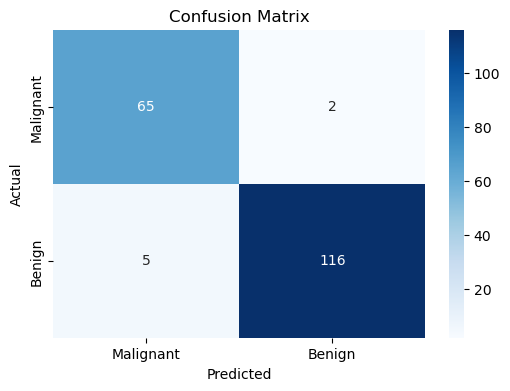

In [28]:
# Step 7 (Optional): Visualize the confusion matrix using heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [4]:
'''
Key Concepts (Performance Metrics in Classification Algorithms/Models) :------

Accuracy: Measures the overall correctness of the model's predictions. useful if dataset is balanced
Confusion Matrix: Shows the counts of true positives, true negatives, false positives, and false negatives.
Precision: Measures how many of the positive predictions were actually correct.
Recall: Measures how many of the actual positive instances were captured by the model.
F1-Score: Harmonic mean of precision and recall, especially useful when the class distribution is imbalanced.

'''

"\nKey Concepts (Performance Metrics in Classification Algorithms/Models) :------\n\nAccuracy: Measures the overall correctness of the model's predictions. useful if dataset is balanced\nConfusion Matrix: Shows the counts of true positives, true negatives, false positives, and false negatives.\nPrecision: Measures how many of the positive predictions were actually correct.\nRecall: Measures how many of the actual positive instances were captured by the model.\nF1-Score: Harmonic mean of precision and recall, especially useful when the class distribution is imbalanced.\n\n"